In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

### load census data

In [3]:
df_manzanas_vivienda = pd.read_csv('inei_2017_data/inei2017_manzana_data_vivienda.csv')
df_manzanas_poblacion = pd.read_csv('inei_2017_data/inei2017_data_manzanas_poblacion.csv')
df_zonas_vivienda = pd.read_csv('inei_2017_data/inei2017_zona_data_vivienda.csv')
df_zonas_poblacion = pd.read_csv('inei_2017_data/inei2017_zona_data_poblacion.csv')

In [4]:
df_manzanas_vivienda.shape, df_manzanas_poblacion.shape

((23674, 107), (23674, 169))

In [5]:
df_zonas_vivienda.shape, df_zonas_poblacion.shape

((2226, 105), (2226, 167))

### load geospatial data

In [6]:
gdf_manzanas = gpd.read_file('lima_departamento_manzanas/lima_departamento_manzanas.shp')
gdf_zonas = gpd.read_file('lima_departamento_zonas/lima_departamento_zonas.shp')

In [7]:
gdf_manzanas.shape, gdf_zonas.shape

((143786, 18), (2226, 13))

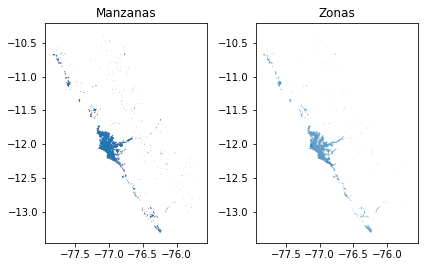

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_title('Manzanas')
gdf_manzanas.plot(ax=ax1)

ax2.set_title('Zonas')
gdf_zonas.plot(ax=ax2)

plt.tight_layout()

### Merge data with geometries

In [9]:
gdf_zonas.head()

,OBJECTID,IDZONA,CODDPTO,CODPROV,CODDIST,CODZONA,SUFZONA,UBIGEO,NOMCCPP,CODCCPP,Shape_Leng,Shape_Area,geometry
0,1.0,15010100100,15,01,01,001,00,150101,LIMA,0001,0.042933,0.000091,"POLYGON ((-77.07324 -12.03566, -77.07316 -12.0..."
1,2.0,15010100200,15,01,01,002,00,150101,LIMA,0001,0.031032,0.000027,"POLYGON ((-77.06954 -12.03448, -77.06934 -12.0..."
2,3.0,15010100300,15,01,01,003,00,150101,LIMA,0001,0.023455,0.000025,"POLYGON ((-77.06332 -12.03516, -77.06330 -12.0..."
3,4.0,15010100400,15,01,01,004,00,150101,LIMA,0001,0.046387,0.000095,"POLYGON ((-77.05927 -12.03955, -77.05922 -12.0..."
4,5.0,15010100500,15,01,01,005,00,150101,LIMA,0001,0.034467,0.000045,"POLYGON ((-77.07221 -12.04934, -77.07220 -12.0..."


el IDZONA combina el CODDPTO, CODPROV, CODDIST (UBIGEO), CODZONA, SUFZONA

In [10]:
gdf_manzanas.head()

,OBJECTID,IDMANZANA,CODDPTO,CODPROV,CODDIST,CODZONA,SUFZONA,CODMZNA,SUFMZNA,UBIGEO,IDCCPP,NOMCCPP,DEPARTAMEN,DISTRITO,Shape_Leng,Shape_Area,PROVINCIA,geometry
0,1.0,150101013000450,15,01,01,013,00,045,0,150101,1501010001,LIMA,LIMA,LIMA,0.002454,3.140281e-07,LIMA,"POLYGON ((-77.06513 -12.05393, -77.06549 -12.0..."
1,2.0,150101013000410,15,01,01,013,00,041,0,150101,1501010001,LIMA,LIMA,LIMA,0.003969,4.670636e-07,LIMA,"POLYGON ((-77.06667 -12.05350, -77.06630 -12.0..."
2,3.0,150101013000350,15,01,01,013,00,035,0,150101,1501010001,LIMA,LIMA,LIMA,0.001773,6.790686e-08,LIMA,"POLYGON ((-77.06712 -12.05334, -77.06711 -12.0..."
3,4.0,150101013000370,15,01,01,013,00,037,0,150101,1501010001,LIMA,LIMA,LIMA,0.002416,1.303426e-07,LIMA,"POLYGON ((-77.06729 -12.05376, -77.06739 -12.0..."
4,5.0,150101013000340,15,01,01,013,00,034,0,150101,1501010001,LIMA,LIMA,LIMA,0.001533,6.984725e-08,LIMA,"POLYGON ((-77.06751 -12.05394, -77.06758 -12.0..."


el IDMANZANA combina el CODDPTO(var), CODPROV(2), CODDIST(2) (UBIGEO), CODZONA(3), SUFZONA(2), CODMZNA(3), SUFMZNA(1)

In [11]:
# Validate id
gdf_manzanas['IDMANZANA'].unique().shape[0] == gdf_manzanas.shape[0]

True

In [12]:
# Validate id 
gdf_zonas['IDZONA'].unique().shape[0] == gdf_zonas.shape[0]

True

In [13]:
id_columns = ['UBIGEO', 'CODZONA', 'SUFZONA', 'CODMZNA', 'SUFMZNA']
c = ''
for col in id_columns:
    print()
    print(col)
    print(gdf_manzanas[col].dtype)
    print(gdf_manzanas[col].value_counts())
    c += gdf_manzanas[col].iloc[0]


UBIGEO
object
150132    16358
150103     8921
150143     8018
150106     7434
070106     6038
          ...  
151012       17
150903       17
151031       15
150712       14
151002       12
Name: UBIGEO, Length: 178, dtype: int64

CODZONA
object
001    10274
002     7700
003     6236
004     5106
005     4651
       ...  
178       34
175       31
177       26
197       22
146       18
Name: CODZONA, Length: 158, dtype: int64

SUFZONA
object
00    125461
01      9161
02      4851
03      2070
04      1018
05       635
06       301
07       183
08       106
Name: SUFZONA, dtype: int64

CODMZNA
object
001    4875
002    3345
003    3159
010    2936
005    2891
       ... 
150       1
149       1
147       1
146       1
154       1
Name: CODMZNA, Length: 158, dtype: int64

SUFMZNA
object
0    88106
A    14720
B     9243
C     5929
D     4112
E     3094
F     2456
G     2016
H     1674
I     1457
J     1317
K     1170
L     1020
M      940
N      839
O      736
P      649
Q      584
R    

In [14]:
df_manzanas_vivienda.columns[:20], df_manzanas_poblacion.columns[:20]

(Index(['UBIGEO', 'CCDD', 'DPTO', 'CCPP', 'PROVINCIA', 'CCDI', 'DISTRITO',
        'CODCCPP', 'NOMCCPP', 'ZONA_ID', 'ZONA_A', 'MANZANA_ID', 'MANZANA_A',
        'VIV_PART', 'HOGARES', 'C2_P1_1', 'C2_P1_2', 'C2_P1_3', 'C2_P1_4',
        'C2_P1_5'],
       dtype='object'),
 Index(['UBIGEO', 'CCDD', 'DPTO', 'CCPP', 'PROVINCIA', 'CCDI', 'DISTRITO',
        'CODCCPP', 'NOMCCPP', 'ZONA_ID', 'ZONA_A', 'MANZANA_ID', 'MANZANA_A',
        'POB_TOTAL', 'C5_P2_1', 'C5_P2_2', 'GRUPO_Q1', 'GRUPO_Q2', 'GRUPO_Q3',
        'GRUPO_Q4'],
       dtype='object'))

In [15]:
# Validar identificador
df_manzanas_vivienda['IDManzana'].unique().shape[0] == df_manzanas_vivienda.shape[0]

False

In [16]:
id_columns_data = ['UBIGEO', 'ZONA_ID', 'ZONA_A', 'MANZANA_ID', 'MANZANA_A']

In [17]:
df_manzanas_vivienda[id_columns_data].head()

,UBIGEO,ZONA_ID,ZONA_A,MANZANA_ID,MANZANA_A
0,70101,1,NaN,001,NaN
1,70101,1,NaN,024,NaN
2,70101,1,NaN,030,NaN
3,70101,1,NaN,039,NaN
4,70101,1,NaN,041,NaN


In [18]:
c = ''
for col in id_columns_data:
    print()
    print(col)
    print(df_manzanas_vivienda[col].dtype)
    print(df_manzanas_vivienda[col].value_counts())
    c += str(df_manzanas_vivienda[col].iloc[0])


UBIGEO
int64
150132    2440
150135    1988
150110    1422
70101     1248
150103    1211
          ... 
151027       1
150732       1
150402       1
150706       1
151030       1
Name: UBIGEO, Length: 178, dtype: int64

ZONA_ID
int64
1      1103
2      1013
3      1003
4       899
5       754
       ... 
194       1
178       1
146       1
193       1
171       1
Name: ZONA_ID, Length: 158, dtype: int64

ZONA_A
object
A    443
B    226
C     77
D     30
E     12
F      5
G      4
H      3
Name: ZONA_A, dtype: int64

MANZANA_ID
object
MANZANAS CON MENOS DE 150 HABITANTES    2224
001                                      488
006                                      417
010                                      410
002                                      409
                                        ... 
077                                        1
086                                        1
092                                        1
087                                        1
089       

### Verify ID composition

- In geodata:  
150101 - UBIGEO,	
013 - CODZONA	
00	- SUFZONA  
045	- CODMZNA  
0	- SUFMZNA  

- In data (as individual rows):  
70101 - UBIGEO  
1	- ZONA_ID  
NaN	- ZONA_A  
001	- MANZANA_ID  
NaN - MANZANA_A  

- In data (as actual ID - flawed):  
070101 - UBIGEO  
001 - CODZONA  
00 - SUFZONA  
001 - CODMZNA  

### Build new ID 

In [19]:
def create_manzanas_id(df_original):
    zona_a_2_sufzona = {
        'A': '01',
        'B': '02',
        'C': '03',
        'D': '04',
        'E': '05',
        'F': '06',
        'G': '07',
        'H': '08'
    }
    
    df = df_original.copy()
    df['UBIGEO_'] = df['UBIGEO'].astype(str).str.zfill(6)
    df['CODZONA'] = df['ZONA_ID'].astype(str).str.zfill(3)
    df['SUFZONA'] = df['ZONA_A'].fillna('00').replace(zona_a_2_sufzona)
    df['SUFMZNA'] = df['MANZANA_A'].fillna('0')
    df['CODMZNA'] = df['MANZANA_ID']
    
    df['IDMANZANA'] = (df['UBIGEO_'] + df['CODZONA'] + df['SUFZONA'] +
                       df['CODMZNA'] + df['SUFMZNA'])
    
    return df['IDMANZANA']

In [20]:
df_manzanas_vivienda['IDMANZANA'] = create_manzanas_id(df_manzanas_vivienda)

In [21]:
# Verify ID
df_manzanas_vivienda['IDMANZANA'].unique().shape[0] == df_manzanas_vivienda.shape[0]

True

In [22]:
df_manzanas_poblacion['IDMANZANA'] = create_manzanas_id(df_manzanas_poblacion)

In [23]:
# Verify ID
df_manzanas_poblacion['IDMANZANA'].unique().shape[0] == df_manzanas_poblacion.shape[0]

True

In [24]:
df_zonas_poblacion.columns[:20]

Index(['UBIGEO', 'CCDD', 'DPTO', 'CCPP', 'PROVINCIA', 'CCDI', 'DISTRITO',
       'CODCCPP', 'NOMCCPP', 'ZONA_ID', 'ZONA_A', 'POB_TOTAL', 'C5_P2_1',
       'C5_P2_2', 'GRUPO_Q1', 'GRUPO_Q2', 'GRUPO_Q3', 'GRUPO_Q4', 'GRUPO_Q5',
       'GRUPO_Q6'],
      dtype='object')

In [25]:
def create_zonas_id(df_original):
    zona_a_2_sufzona = {
        'A': '01',
        'B': '02',
        'C': '03',
        'D': '04',
        'E': '05',
        'F': '06',
        'G': '07',
        'H': '08'
    }
    
    df = df_original.copy()
    df['UBIGEO_'] = df['UBIGEO'].astype(str).str.zfill(6)
    df['CODZONA'] = df['ZONA_ID'].astype(str).str.zfill(3)
    df['SUFZONA'] = df['ZONA_A'].fillna('00').replace(zona_a_2_sufzona)

    
    df['IDZONA'] = (df['UBIGEO_'] + df['CODZONA'] + df['SUFZONA'])
    
    return df['IDZONA']

In [26]:
df_zonas_poblacion['IDZONA'] = create_zonas_id(df_zonas_poblacion)

In [27]:
# Verify ID
df_zonas_poblacion['IDZONA'].unique().shape[0] == df_zonas_poblacion.shape[0]

True

In [28]:
df_zonas_vivienda['IDZONA'] = create_zonas_id(df_zonas_vivienda)

In [29]:
# Verify ID
df_zonas_vivienda['IDZONA'].unique().shape[0] == df_zonas_vivienda.shape[0]


True

In [30]:
gdf_manzanas.shape, df_manzanas_poblacion.shape, df_manzanas_vivienda.shape

((143786, 18), (23674, 170), (23674, 108))

In [31]:
gdf_zonas.shape, df_zonas_poblacion.shape, df_zonas_vivienda.shape

((2226, 13), (2226, 168), (2226, 106))

In [32]:
gdf_manzanas_vivienda = pd.merge(
    left = gdf_manzanas,
    right = df_manzanas_vivienda,
    how = 'left',
    left_on = 'IDMANZANA',
    right_on = 'IDMANZANA'
)


In [33]:
gdf_manzanas_vivienda.shape

(143786, 125)

In [34]:
gdf_manzanas_vivienda.isna().sum() / gdf_manzanas_vivienda.shape[0]

OBJECTID     0.000000
IDMANZANA    0.000000
CODDPTO      0.000000
CODPROV      0.000000
CODDIST      0.000000
               ...   
C3_P2_15     0.850945
C3_P2_16     0.850945
C3_P3_1      0.850945
C3_P3_2      0.850945
IDManzana    0.850945
Length: 125, dtype: float64

In [35]:
gdf_manzanas_poblacion = pd.merge(
    left = gdf_manzanas,
    right = df_manzanas_poblacion,
    how = 'left',
    left_on = 'IDMANZANA',
    right_on = 'IDMANZANA'
)

In [36]:
gdf_manzanas_poblacion.shape

(143786, 187)

In [37]:
gdf_manzanas_poblacion.isna().sum() / gdf_manzanas_poblacion.shape[0]

OBJECTID     0.000000
IDMANZANA    0.000000
CODDPTO      0.000000
CODPROV      0.000000
CODDIST      0.000000
               ...   
C5_P27_5     0.850945
C5_P27_6     0.850945
C5_P27_7     0.850945
C5_P27_8     0.850945
C5_P27_9     0.850945
Length: 187, dtype: float64

In [38]:
gdf_zonas_vivienda = pd.merge(
    left = gdf_zonas,
    right = df_zonas_vivienda,
    how = 'left',
    left_on = 'IDZONA',
    right_on = 'IDZONA'
)

gdf_zonas_poblacion = pd.merge(
    left = gdf_zonas,
    right = df_zonas_poblacion,
    how = 'left',
    left_on = 'IDZONA',
    right_on = 'IDZONA'
)

In [39]:
gdf_zonas_vivienda.shape

(2226, 118)

In [40]:
gdf_zonas_vivienda.isna().sum() / gdf_zonas_vivienda.shape[0]

OBJECTID     0.0
IDZONA       0.0
CODDPTO      0.0
CODPROV      0.0
CODDIST      0.0
            ... 
C3_P2_15     0.0
C3_P2_16     0.0
C3_P3_1      0.0
C3_P3_2      0.0
IDMANZANA    1.0
Length: 118, dtype: float64

### Filter data in Lima Metropolitana

In [41]:
limites_distritos = gpd.read_file('../inputs/lima_distritos/lima_metropolitana.shp')
minx, miny, maxx, maxy = limites_distritos.total_bounds

In [42]:
gdf_zonas_poblacion_lima_metropolitana = gdf_zonas_poblacion.cx[minx:maxx, miny:maxy]
gdf_manzanas_poblacion_lima_metropolitana = gdf_manzanas_poblacion.cx[minx:maxx, miny:maxy]


gdf_zonas_vivienda_lima_metropolitana = gdf_zonas_vivienda.cx[minx:maxx, miny:maxy]
gdf_manzanas_vivienda_lima_metropolitana = gdf_manzanas_vivienda.cx[minx:maxx, miny:maxy]

In [43]:
gdf_zonas_poblacion_lima_metropolitana.shape, gdf_zonas_vivienda_lima_metropolitana.shape


((1746, 180), (1746, 118))

In [44]:
gdf_manzanas_vivienda_lima_metropolitana.shape, gdf_manzanas_poblacion_lima_metropolitana.shape

((119266, 125), (119266, 187))

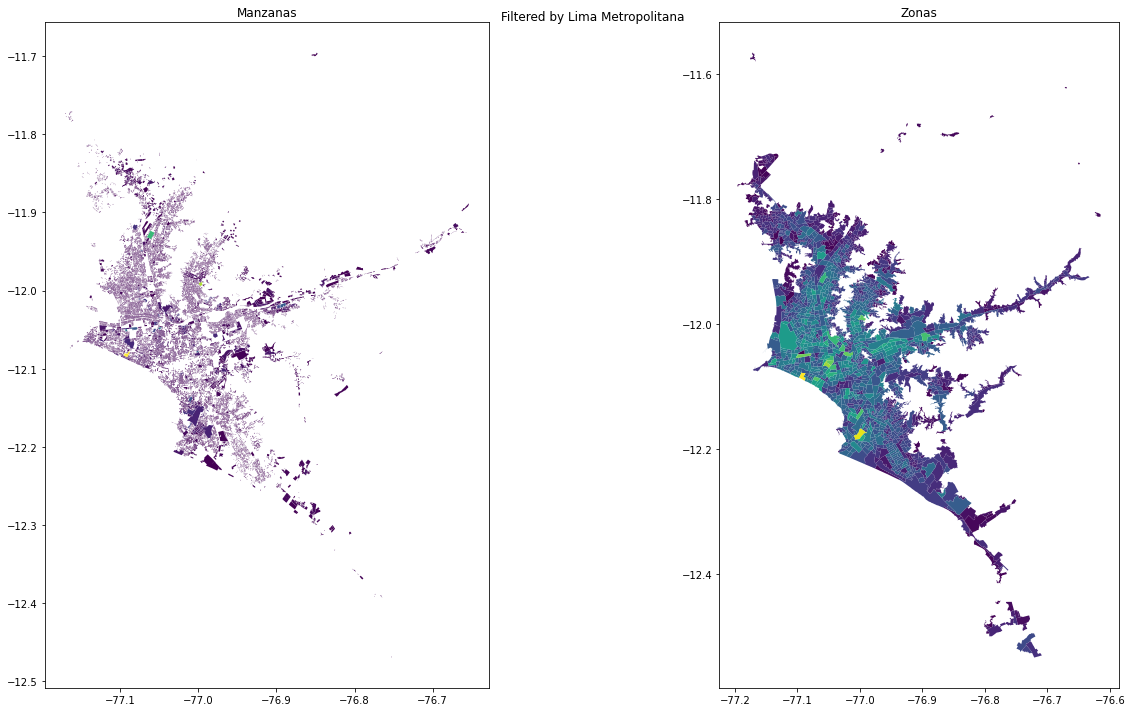

In [45]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

plt.suptitle('Filtered by Lima Metropolitana')

ax1.set_title('Manzanas')
gdf_manzanas_poblacion_lima_metropolitana.plot(column='POB_TOTAL', ax=ax1)

ax2.set_title('Zonas')
gdf_zonas_poblacion_lima_metropolitana.plot(column='POB_TOTAL', ax=ax2)

plt.tight_layout()

In [86]:
gdf_zonas_poblacion_lima_metropolitana.to_file('zonas_poblacion_lima_metropolitana.geojson', driver='GeoJSON')

In [46]:
gdf_zonas_poblacion_lima_metropolitana.to_file('zonas_poblacion_lima_metropolitana/zonas_poblacion_lima_metropolitana')

In [47]:
gdf_zonas_vivienda_lima_metropolitana.to_file('zonas_vivienda_lima_metropolitana/zonas_vivienda_lima_metropolitana')